# PCA  ANALYSIS

#                                                  PCA
What is PCA:
Feature reduction techniques.Suppose I have a lot of data which denoted by X,I want to reduce element from data and make a new data frame which denoted by Y,where Y represent the whole data set X.
Why need:

name	id	dept	chairman
Sayed(feature1)	001	chemistry	Abdul alim
Newaj(feature 2)	002	pharmacy	Abdul alim


Suppose I have feature1,feature2………feature100.All features are not important and so I have need reduce some feature by which techniques use to reduce unnecessary feature is known as PCA.
There are 100 principal components by default but I have no need all principal components.I select top N principal components for my model design.
#Basic fundamental information:
1.	Scaler quantity(value)
2.	Vector quantity(direction and value)
3.	Matrix
4.	Eigen value,Eigen vector
5.	Matrix Transpose



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import eig
import seaborn as sns

In [2]:
#setp1 : define data set
df =pd.read_csv('pca.csv')
df

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364
...,...,...
892811,1488022,0.0364
892812,1488023,0.0364
892813,1488024,0.0364
892814,1488025,0.0364


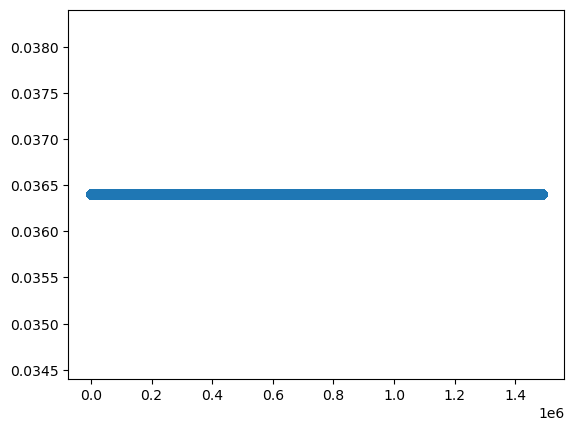

In [9]:
#try to visuallize
plt.scatter(df['id'],df['target']);

In [15]:
#step2:making data mean centric
meanbycolumn=np.mean(df.T,axis=1)
print(meanbycolumn)
scaled_data=df-meanbycolumn

id        744153.461357
target         0.036400
dtype: float64


In [19]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,892806,892807,892808,892809,892810,892811,892812,892813,892814,892815
id,0.0000,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,8.0000,10.0000,11.0000,...,1.488014e+06,1.488015e+06,1.488018e+06,1.488019e+06,1.488020e+06,1.488022e+06,1.488023e+06,1.488024e+06,1.488025e+06,1.488026e+06
target,0.0364,0.0364,0.0364,0.0364,0.0364,0.0364,0.0364,0.0364,0.0364,0.0364,...,3.640000e-02,3.640000e-02,3.640000e-02,3.640000e-02,3.640000e-02,3.640000e-02,3.640000e-02,3.640000e-02,3.640000e-02,3.640000e-02


In [20]:
scaled_data

,id,target
0,-744153.461357,-6.387599e-13
1,-744152.461357,-6.387599e-13
2,-744151.461357,-6.387599e-13
3,-744150.461357,-6.387599e-13
4,-744149.461357,-6.387599e-13
...,...,...
892811,743868.538643,-6.387599e-13
892812,743869.538643,-6.387599e-13
892813,743870.538643,-6.387599e-13
892814,743871.538643,-6.387599e-13


In [21]:
#step3: find covariance matrix of above scaled data
cov_mat=np.cov(scaled_data.T) #transpose due to we want to do this feature by feature
cov_mat

array([[1.84627455e+11, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00]])

In [22]:
#step4: finding corresponding eigen value and eigen vector of above covariance matrix
Eval,Evec=eig(cov_mat)
print(Eval)
print(Evec)

[1.84627455e+11 0.00000000e+00]
[[1. 0.]
 [0. 1.]]


In [24]:
projected_data=Evec.T.dot(scaled_data.T)
T=projected_data.T
print(T)

[[-7.44153461e+05 -6.38759878e-13]
 [-7.44152461e+05 -6.38759878e-13]
 [-7.44151461e+05 -6.38759878e-13]
 ...
 [ 7.43870539e+05 -6.38759878e-13]
 [ 7.43871539e+05 -6.38759878e-13]
 [ 7.43872539e+05 -6.38759878e-13]]


In [30]:
np.savetxt('T.csv',T)

# Another process

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit_transform(df)

array([[ 7.44153461e+05,  6.93889390e-18],
       [ 7.44152461e+05,  6.93889390e-18],
       [ 7.44151461e+05,  6.93889390e-18],
       ...,
       [-7.43870539e+05,  6.93889390e-18],
       [-7.43871539e+05,  6.93889390e-18],
       [-7.43872539e+05,  6.93889390e-18]])

In [33]:
pca.explained_variance_ratio_ #variance explanation ratio by each PC

array([1.00000000e+00, 2.60786256e-46])

In [34]:
pcdf=pd.DataFrame(data=pca.fit_transform(df),columns=['PC1','PC2'])

In [35]:
pcdf

,PC1,PC2
0,744153.461357,6.938894e-18
1,744152.461357,6.938894e-18
2,744151.461357,6.938894e-18
3,744150.461357,6.938894e-18
4,744149.461357,6.938894e-18
...,...,...
892811,-743868.538643,6.938894e-18
892812,-743869.538643,6.938894e-18
892813,-743870.538643,6.938894e-18
892814,-743871.538643,6.938894e-18


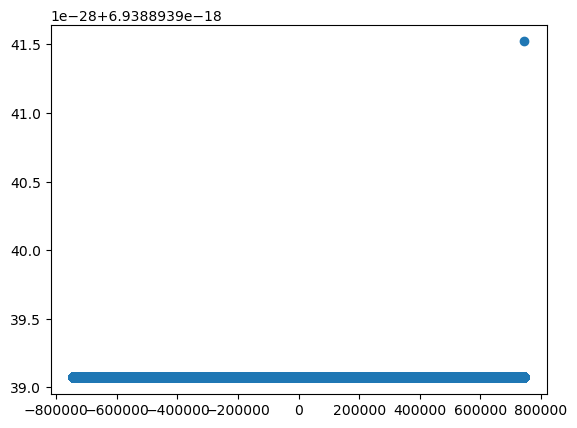

In [36]:
plt.scatter(pcdf['PC1'],pcdf['PC2'])

In [37]:
loadings=pd.DataFrame(pca.components_.T,columns=['PC1','PC2'],index=['id','target'])
loadings

,PC1,PC2
id,-1.000000e+00,6.060283e-37
target,6.060283e-37,1.000000e+00


#### PC1= alpha1.feature1+alpha2.feature2+.............

In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit_transform(df)

array([[ 7.44153461e+05,  6.93889390e-18],
       [ 7.44152461e+05,  6.93889390e-18],
       [ 7.44151461e+05,  6.93889390e-18],
       ...,
       [-7.43870539e+05,  6.93889390e-18],
       [-7.43871539e+05,  6.93889390e-18],
       [-7.43872539e+05,  6.93889390e-18]])

In [11]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=['id','target'])
loading_matrix

,PC1,PC2
id,-4.296830e+05,4.205168e-54
target,2.604000e-31,6.938898e-18


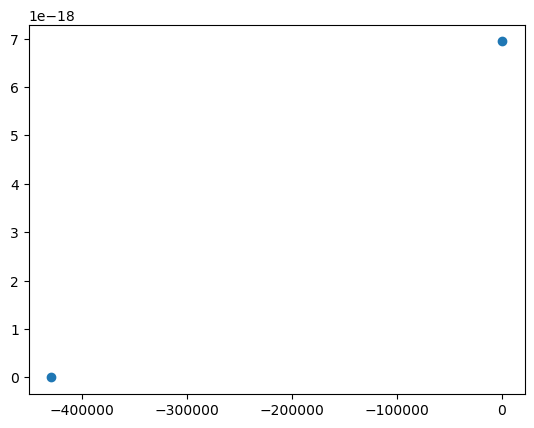

In [14]:
plt.scatter(loading_matrix['PC1'],loading_matrix['PC2'])

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale

In [22]:
df = datasets.load_iris()

In [26]:
x=scale(df.data)
y=df.target

In [31]:
pca = decomposition.PCA(n_components=2)
x = pca.fit_transform(x)

In [33]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.feature_names)
loadings

,PC1,PC2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


In [34]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = '#21918C',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#21918C', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

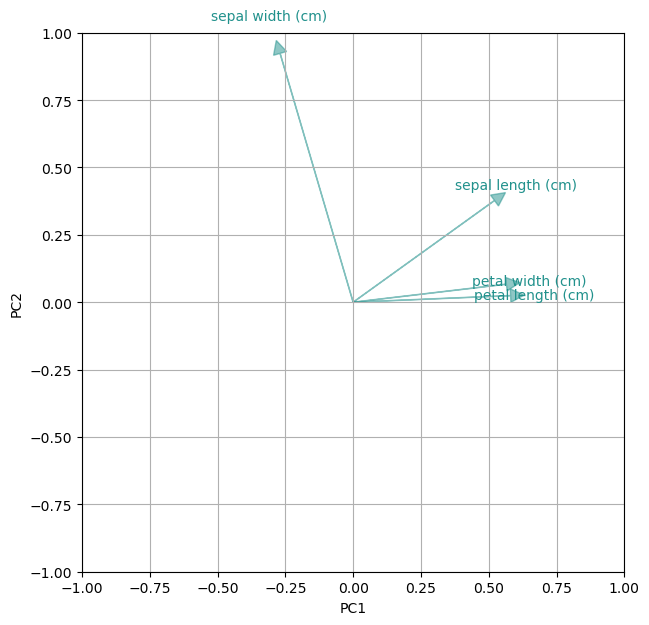

In [35]:
fig, ax = plt.subplots(figsize = (7,7))
loading_plot(pca.components_.T, df.feature_names)